In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
countrydata=pd.read_csv('country-data.csv')

In [3]:
data=countrydata.drop('country',axis=1)

C:\Users\visha\anaconda3\envs\old\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


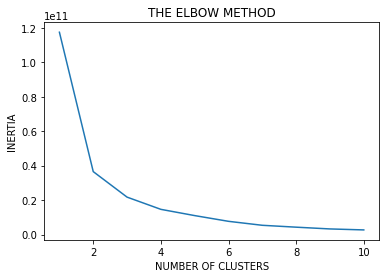

In [4]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)
plt.plot(ks,inertia)
plt.title('THE ELBOW METHOD')
plt.xlabel("NUMBER OF CLUSTERS")
plt.ylabel('INERTIA')
plt.show()


In [5]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(data)
labels=model_kmeans.predict(data)
print(labels)

[0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 2 1 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [6]:
from collections import Counter
Counter(model_kmeans.labels_)

Counter({0: 128, 1: 32, 2: 7})

In [7]:
countrydata['k_labels']=model_kmeans.labels_

In [8]:
countrydata.groupby(['k_labels','country']).mean()

child_mort  exports  health  imports    income  \
k_labels country                                                               
0        Afghanistan                90.2     10.0    7.58     44.9    1610.0   
         Albania                    16.6     28.0    6.55     48.6    9930.0   
         Algeria                    27.3     38.4    4.17     31.4   12900.0   
         Angola                    119.0     62.3    2.85     42.9    5900.0   
         Antigua and Barbuda        10.3     45.5    6.03     58.9   19100.0   
...                                  ...      ...     ...      ...       ...   
2        Luxembourg                  2.8    175.0    7.77    142.0   91700.0   
         Norway                      3.2     39.7    9.48     28.5   62300.0   
         Qatar                       9.0     62.3    1.81     23.8  125000.0   
         Singapore                   2.8    200.0    3.96    174.0   72100.0   
         Switzerland                 4.5     64.0   11.50     53.3   55500.0   

                              inflation  life_expec  total_fer      gdpp  
k_labels country                                                          
0        Afghanistan              9.440        56.2       5.82     553.0  
         Albania                  4.490        76.3       1.65    4090.0  
         Algeria                 16.100        76.5       2.89    4460.0  
         Angola                  22.400        60.1       6.16    3530.0  
         Antigua and Barbuda      1.440        76.8       2.13   12200.0  
...                                 ...         ...        ...       ...  
2        Luxembourg               3.620        81.3       1.63  105000.0  
         Norway                   5.950        81.0       1.95   87800.0  
         Qatar                    6.980        79.5       2.07   70300.0  
         Singapore               -0.046        82.7       1.15   46600.0  
         Switzerland              0.317        82.2       1.52   74600.0  

[167 rows x 9 columns]

In [10]:
#Countries in need of Help are
helpneeded_countries=countrydata[countrydata['k_labels']==0]['country']
helpneeded_countries.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'M